In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\aiml\ml\supervised\insurance\insurance.csv')

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

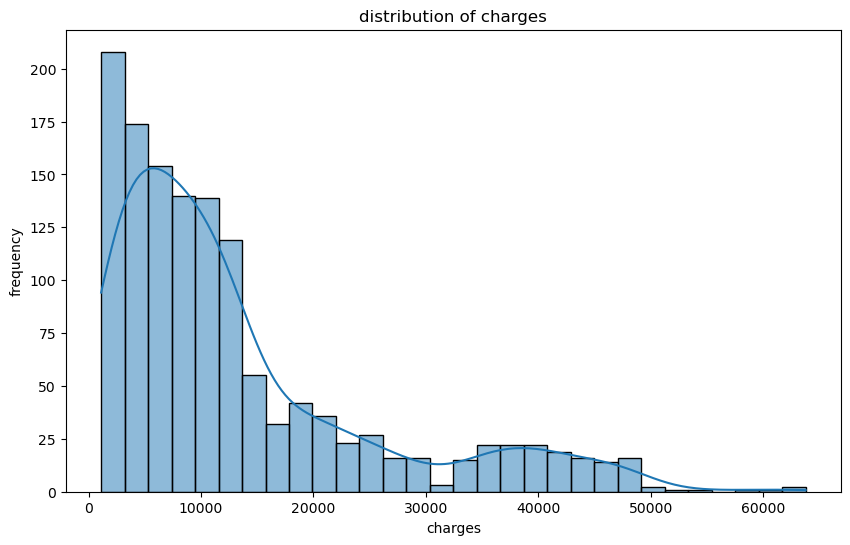

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['charges'],kde=True)
plt.title('distribution of charges')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='age', ylabel='charges'>

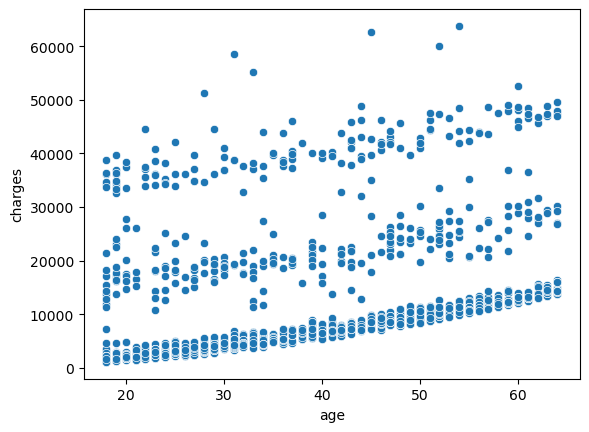

In [8]:
sns.scatterplot(x='age',y='charges',data=df)

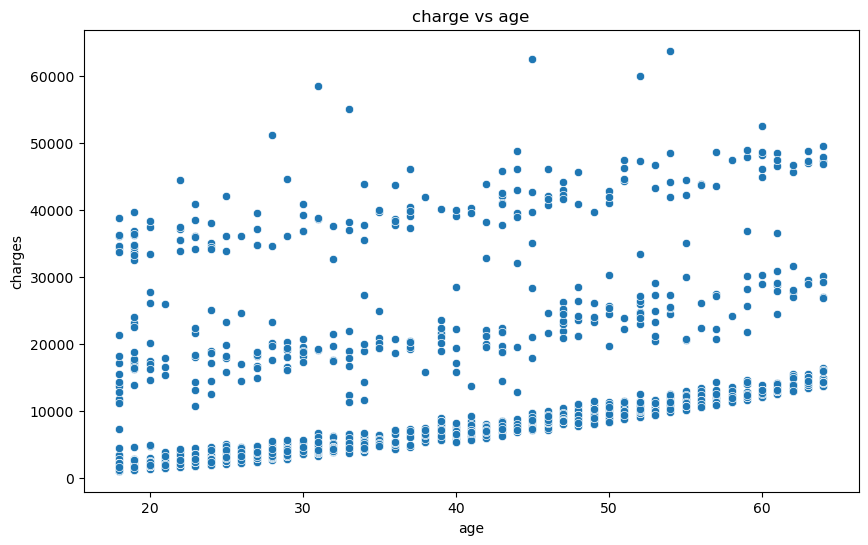

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='charges',data=df)
plt.title('charge vs age')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

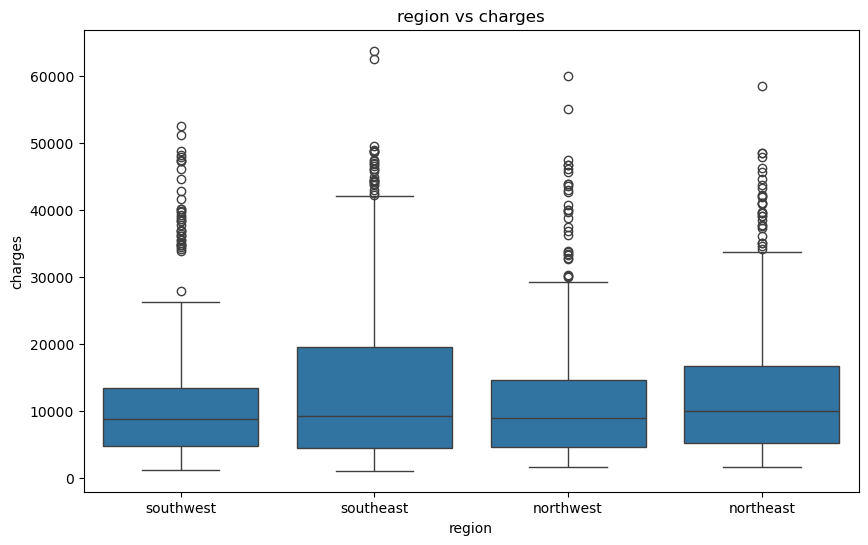

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region',y='charges',data=df)
plt.title('region vs charges')
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

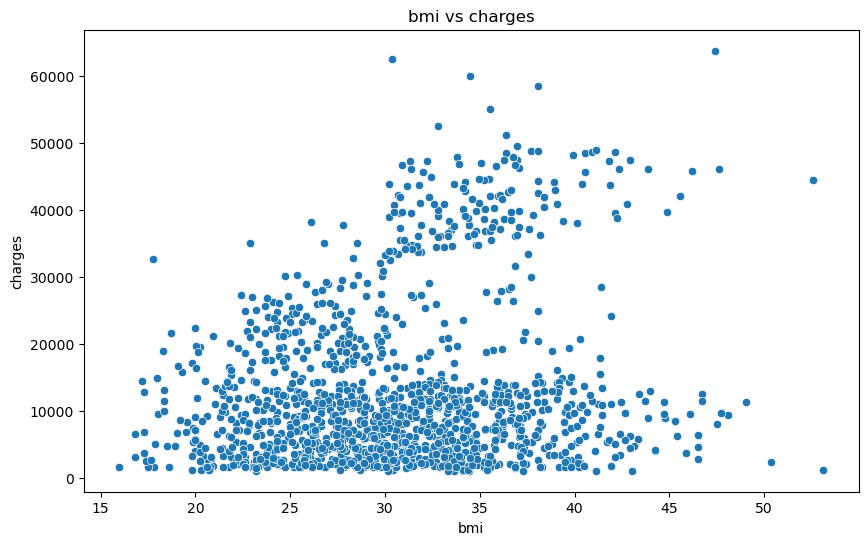

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title('bmi vs charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

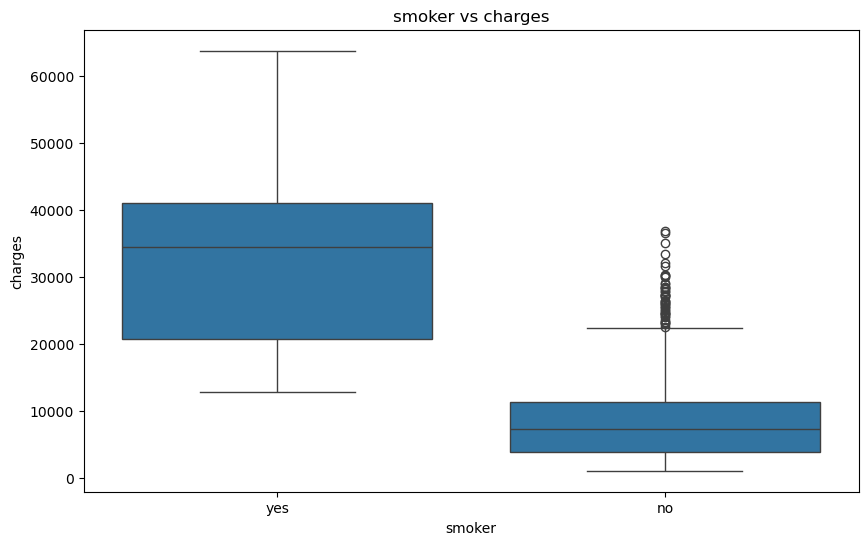

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('smoker vs charges')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

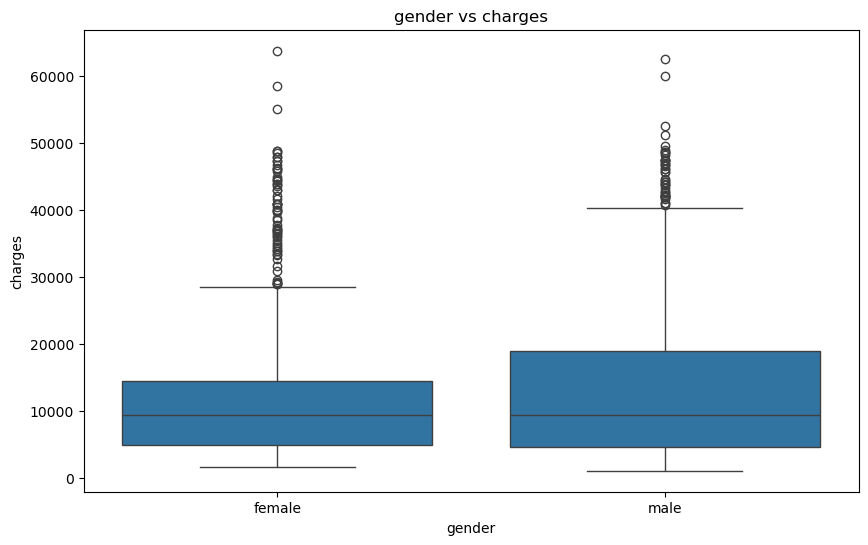

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sex',y='charges',data=df)
plt.title('gender vs charges')
plt.xlabel('gender')
plt.ylabel('charges')
plt.show()

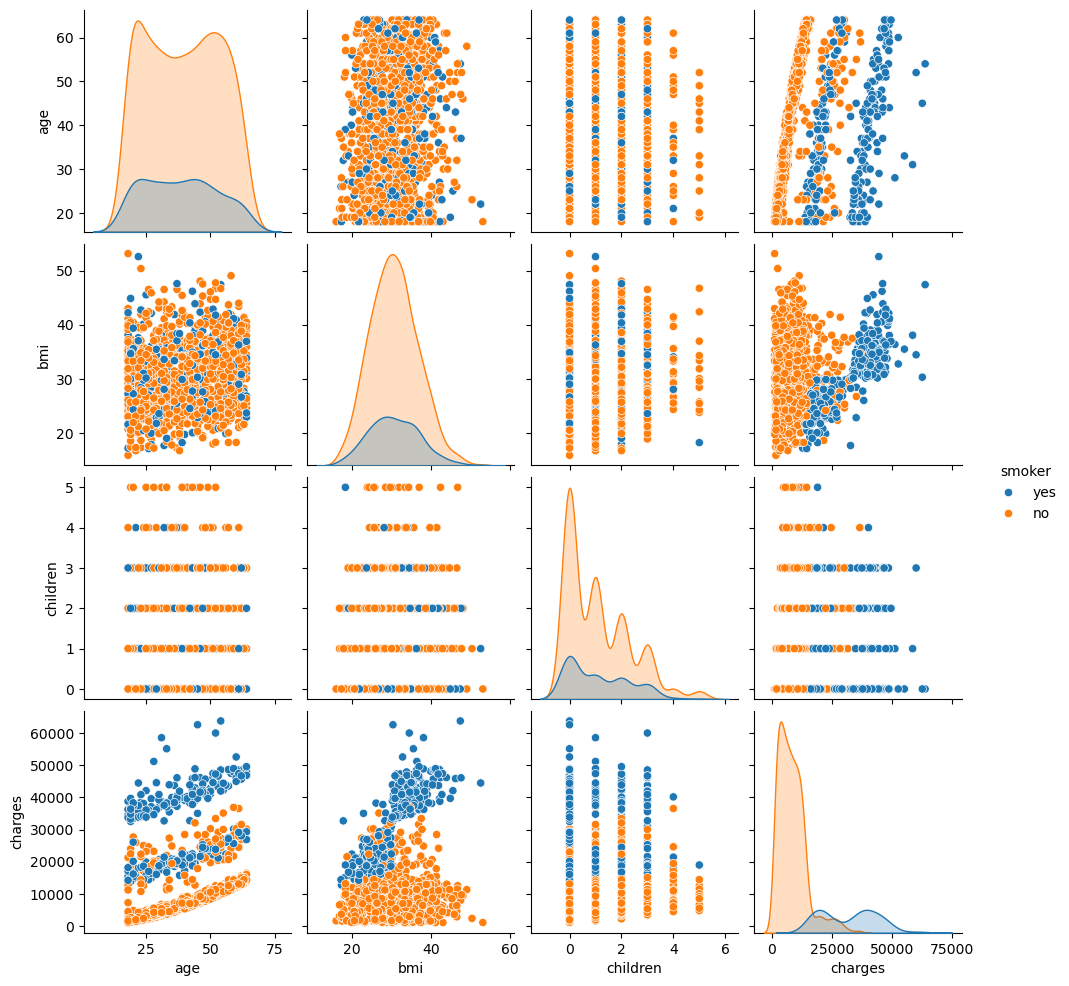

In [14]:
sns.pairplot(df,hue='smoker',diag_kind='kde')


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df.replace({'region':{'northeast':0,'northwest':1,'southwest':2,'southeast':3}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9932\4196856797.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9932\4196856797.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9932\4196856797.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [17]:
x=df.drop(columns='charges',axis=1)
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [18]:
training_data_predictor=r.predict(x_train)
r2_train=metrics.r2_score(y_train,training_data_predictor)
r2_train

0.7518195459072953

In [19]:
testing_data_predictor=r.predict(x_test)
r2_test=metrics.r2_score(y_test,testing_data_predictor)
r2_test

0.7454471618659975

In [20]:
input_data=(31,1,25.7,0,1,0)
iasarr=np.asarray(input_data)
iasarrre=iasarr.reshape(1,-1)
p=r.predict(iasarrre)
p

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28413.11128596])

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [22]:
clf=RandomForestRegressor(n_estimators=100,random_state=2)
clf.fit(x_train,y_train)

RandomForestRegressor(random_state=2)

In [23]:
train=clf.predict(x_train)
r2_train=metrics.r2_score(y_train,train)
r2_train

0.9775680245466498

In [24]:
test=clf.predict(x_test)
r2_test=metrics.r2_score(y_test,test)
r2_test

0.8350803470335437

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso=Lasso(alpha=0.1)
ridge=Ridge(alpha=1)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [26]:
train=lasso.predict(x_train)
r2_train=metrics.r2_score(y_train,train)
r2_train

0.7518195450238037

In [27]:
test=lasso.predict(x_test)
r2_test=metrics.r2_score(y_test,test)
r2_test


0.7454469796240907

In [28]:
train=ridge.predict(x_train)
r2_train=metrics.r2_score(y_train,train)
r2_train

0.7517985398003152

In [29]:
test=ridge.predict(x_test)
r2_test=metrics.r2_score(y_test,test)
r2_test

0.7455267280930137

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
train=lasso.predict(x_train)
r2_train=metrics.r2_score(y_train,train)
r2_train

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


-5.162857296763736

In [33]:
test=lasso.predict(x_test)
r2_test=metrics.r2_score(y_test,test)
r2_test

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


-4.894195244598228

In [34]:
train=ridge.predict(x_train)
r2_train=metrics.r2_score(y_train,train)
r2_train

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


-5.123634698736272

In [35]:
test=ridge.predict(x_test)
r2_test=metrics.r2_score(y_test,test)
r2_test

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


-4.856408126043418

In [36]:
input=(31,1,25.7,0,1,0)
inpu=np.asarray(input)
inp=inpu.reshape(1,-1)
pre=clf.predict(inp)
pre

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18395.266786])

In [37]:
from joblib import dump

In [38]:
dump(clf,'insurance.joblib')

['insurance.joblib']